
Training AND Gate:
Step 1: Input=[-1 -1], Target=-1, Prediction=-1
  Weights=[1.5 1.5], Bias=-1.00
Step 2: Input=[-1  1], Target=-1, Prediction=-1
  Weights=[2.5 0.5], Bias=-2.00
Step 3: Input=[ 1 -1], Target=-1, Prediction=1
  Weights=[1.5 1.5], Bias=-3.00
Step 4: Input=[1 1], Target=1, Prediction=1
  Weights=[2.5 2.5], Bias=-2.00


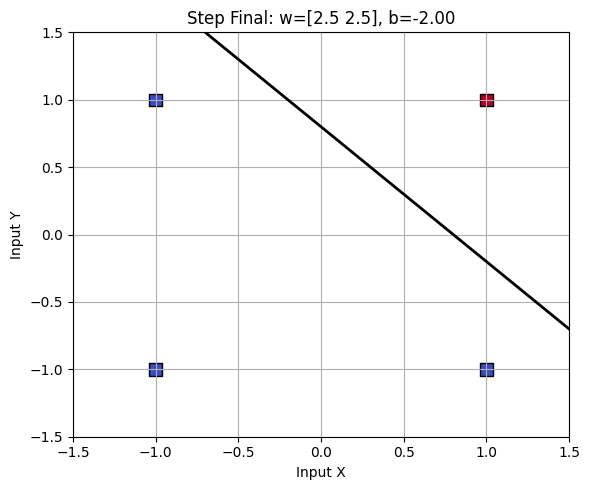


Training OR Gate:
Step 1: Input=[-1 -1], Target=-1, Prediction=-1
  Weights=[1.5 1.5], Bias=-1.00
Step 2: Input=[-1  1], Target=1, Prediction=-1
  Weights=[0.5 2.5], Bias=0.00
Step 3: Input=[ 1 -1], Target=1, Prediction=-1
  Weights=[1.5 1.5], Bias=1.00
Step 4: Input=[1 1], Target=1, Prediction=1
  Weights=[2.5 2.5], Bias=2.00


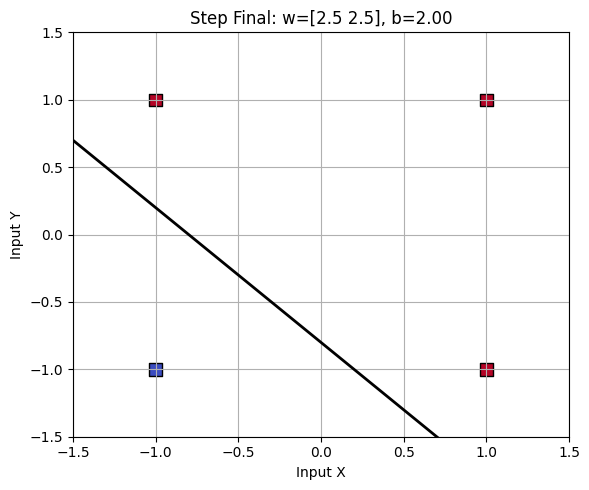

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def neuron_activation(net):
    """Simple step activation function"""
    return 1 if net >= 0 else -1

def hebbian_learn(X, y, w_init, b_init):
    """
    Perform Hebbian learning on input data
    X: Input features (2D array)
    y: Target outputs (1D array)
    w_init: Initial weights [w1, w2]
    b_init: Initial bias
    Returns: weights history, bias history
    """
    w = np.array(w_init, dtype=float)
    b = float(b_init)
    w_history = [w.copy()]
    b_history = [b]
    
    for i in range(len(X)):
        # Calculate net input and prediction
        net = w.dot(X[i]) + b
        pred = neuron_activation(net)
        
        # Hebbian weight update
        w = w + X[i] * y[i]
        b = b + y[i]
        
        # Store history for plotting
        w_history.append(w.copy())
        b_history.append(b)
        
        print(f"Step {i+1}: Input={X[i]}, Target={y[i]}, Prediction={pred}")
        print(f"  Weights={w}, Bias={b:.2f}")
    
    return w_history, b_history

def plot_decision(X, y, w, b, step):
    """Plot decision boundary at a specific learning step"""
    plt.figure(figsize=(6, 5))
    plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', 
                marker='s', s=80, edgecolor='k')
    
    # Create decision boundary
    x_min, x_max = -1.5, 1.5
    y_min, y_max = -1.5, 1.5
    
    if abs(w[1]) > 0.001:  # Avoid division by zero
        x_vals = np.array([x_min, x_max])
        y_vals = (-w[0]*x_vals - b) / w[1]
        plt.plot(x_vals, y_vals, 'k-', linewidth=2)
    else:
        plt.axvline(x=-b/w[0], color='k', linewidth=2)
    
    plt.title(f'Step {step}: w={w}, b={b:.2f}')
    plt.xlabel('Input X')
    plt.ylabel('Input Y')
    plt.grid(True)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.tight_layout()
    plt.show()

def run_gate_example(gate_type):
    """Run example for a specific logic gate"""
    if gate_type == "AND":
        X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
        y = np.array([-1, -1, -1, 1])
        print("\nTraining AND Gate:")
    elif gate_type == "OR":
        X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
        y = np.array([-1, 1, 1, 1])
        print("\nTraining OR Gate:")
    else:
        raise ValueError("Invalid gate type. Use 'AND' or 'OR'")
    
    # Train with initial parameters
    w_history, b_history = hebbian_learn(X, y, [0.5, 0.5], 0)
    
    # Plot final decision boundary
    plot_decision(X, y, w_history[-1], b_history[-1], "Final")

def load_and_train(csv_file):
    """Load data from CSV and train"""
    data = pd.read_csv(csv_file)
    X = data[['x', 'y']].values
    y = data['target'].values
    
    print(f"\nTraining with {csv_file}:")
    w_history, b_history = hebbian_learn(X, y, [0.5, 0.5], 0)
    
    # Plot final decision boundary
    plot_decision(X, y, w_history[-1], b_history[-1], "Final")
    return w_history[-1], b_history[-1]

# Example usage
if __name__ == "__main__":
    # Run gate examples
    run_gate_example("AND")
    run_gate_example("OR")
    
    # For = CSV file (uncomment and replace filename)
    # final_weights, final_bias = load_and_train("new_data.csv")
    # print(f"Final weights: {final_weights}, Bias: {final_bias}")